# Artificial Neural Networks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data
df=pd.read_csv('Alphabets_data.csv')
# Basic Evaluation
df.head()
df.info
df.describe()
df.isnull().sum()
df['letter'].value_counts().count()
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


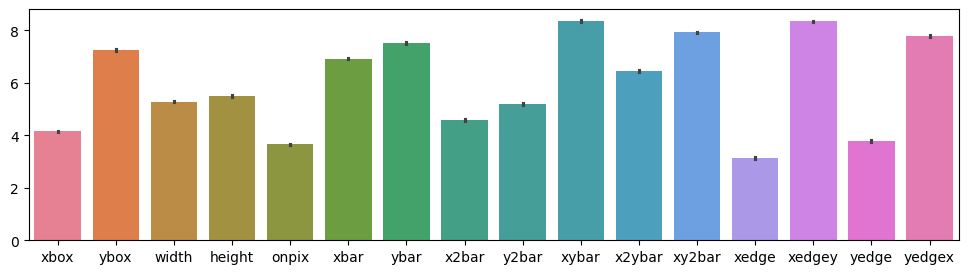

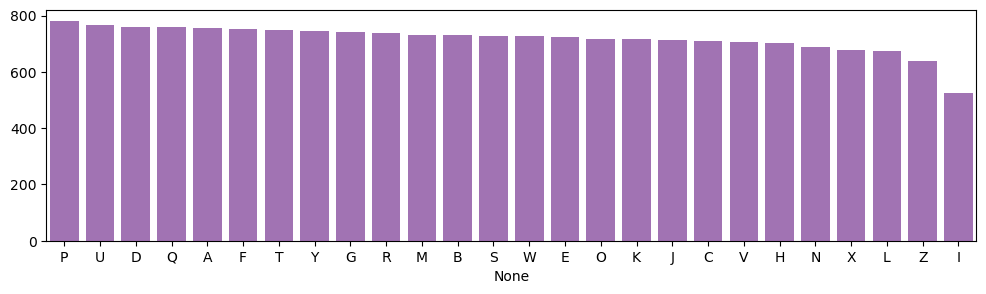

In [20]:
# Visualization
# Bargraph to find data Distribution
plt.figure(figsize=(12,3))
sns.barplot(df)
plt.show()

# Bargraph for finding letter count
letter_count=df['letter'].value_counts()
plt.figure(figsize=(12,3))
sns.barplot(x=letter_count.index,y=letter_count.values,color='#a569bd')
plt.show()

In [4]:
# Removing Duplicates
df[df.duplicated()]
df.drop_duplicates(inplace=True)
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
# Spliting into X and Y
X_=df.iloc[:,1:]
y=df['letter']

In [6]:
# Normalising features for conciseness
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scl_arr=scaler.fit_transform(X_)
X=pd.DataFrame(scl_arr,columns=X_.columns)
X.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,0.133333,0.533333,0.2,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333
1,0.333333,0.800000,0.2,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667
2,0.266667,0.733333,0.4,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000
3,0.466667,0.733333,0.4,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333
4,0.133333,0.066667,0.2,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667


In [7]:
# Encoding label data
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
y_=enc.fit_transform(y)
y=pd.DataFrame(y_,columns=['enc_letter'])


In [8]:
# Spliting data into Train and Test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y_test.shape

(3734, 1)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
# Building model
model=Sequential()
num_classes = len(enc.classes_)
model.add(Dense(8, input_dim=16,  activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
# Setuping compile for code redability
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [10]:
# Training model
history=model.fit(X_train,y_train,
                  validation_split=0.2,
                  epochs=100,
                  batch_size=42,callbacks=[early_stopping])

Epoch 1/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0773 - loss: 3.1753 - val_accuracy: 0.2216 - val_loss: 2.6319
Epoch 2/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2474 - loss: 2.4739 - val_accuracy: 0.3170 - val_loss: 2.1802
Epoch 3/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3494 - loss: 2.0863 - val_accuracy: 0.3709 - val_loss: 2.0257
Epoch 4/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3910 - loss: 1.9384 - val_accuracy: 0.4051 - val_loss: 1.9426
Epoch 5/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4386 - loss: 1.8358 - val_accuracy: 0.4419 - val_loss: 1.8427
Epoch 6/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4673 - loss: 1.7763 - val_accuracy: 0.4737 - val_loss: 1.7731
Epoch 7/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4989 - loss: 1.7015 - val_accuracy: 0.4861 - val_loss: 1.7273
Epoch 8/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5084 - loss: 1.6374 - val_accu

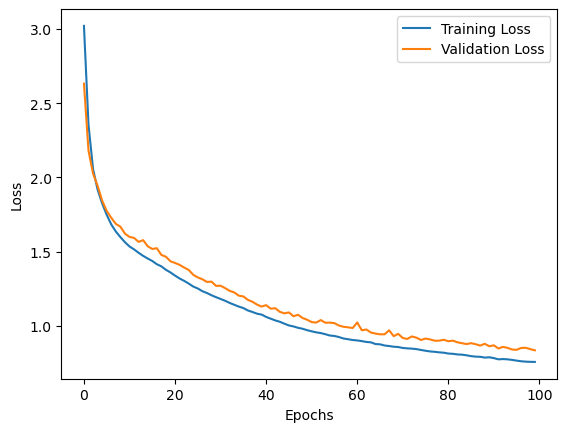

In [11]:
# Visualising training output
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Evaluating Test data 
from sklearn.metrics import classification_report
test_loss,test_acc=model.evaluate(X_test,y_test)

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7671 - loss: 0.8293


In [13]:
# Extracting classification report for test data
ypred_=model.predict(X_test)
ypred=np.argmax(ypred_,axis=1)
print(classification_report(y_test,ypred))

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       144
           1       0.70      0.78      0.74       156
           2       0.71      0.78      0.74       147
           3       0.81      0.69      0.74       163
           4       0.74      0.64      0.68       144
           5       0.76      0.75      0.75       146
           6       0.72      0.70      0.71       173
           7       0.66      0.55      0.60       133
           8       0.90      0.82      0.86       108
           9       0.94      0.77      0.85       150
          10       0.78      0.71      0.74       149
          11       0.88      0.87      0.87       147
          12       0.91      0.83      0.87       143
          13       0.81      0.82      0.81       138
          14       0.70      0.65      0.67       131
          15       0.78      0.81      0.79       161
          16       0.66      0.69      0

## Hyperparameter Tuining

In [14]:
def create_model(optimizer='adam', neurons=32):
    model=Sequential()
    model.add(Dense(neurons,input_dim=16,activation='relu'))
    model.add(Dense(neurons,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
# Defining model 
model = KerasClassifier(model=create_model, verbose=0) 
# Defing Parameters
param_grid = {
    'batch_size': [16, 32, 64],       
    'epochs': [10, 20],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__neurons': [16, 32, 64]
}

In [18]:
# Training model
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1,error_score='raise')
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [19]:
# printing Evaluation Metrics
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Accuracy: {grid_result.best_score_:.4f}")

# Evaluate the best model on test data
best_model = grid_result.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Best Parameters: {'batch_size': 16, 'epochs': 20, 'model__neurons': 64, 'model__optimizer': 'adam'}
Best Accuracy: 0.8058
Test Accuracy: 0.8417


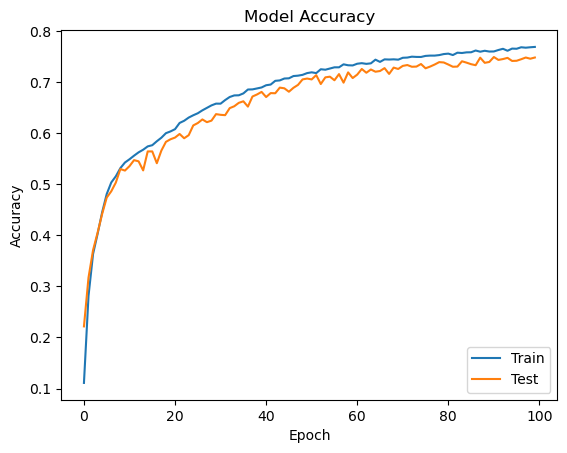

In [26]:
# summarize history for accuracy from basic model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

#### 
    Hyperparameter tuning plays a crucial role in improving model accuracy, reducing overfitting, and optimizing training time.
        Default model accuracy is 76 % and Hyperparameter tuned model given 84.5% of test accuracy.It given more accuracy , reduced overfitting and more stable loss with faster convergence.